# TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be analyzing a dataset from The Movie Database (TMDb) that contains information about more than 10,000 movies. we are interested in finding trends and patterns between different genres, popularity, budgets and the effect of these factors on revenues.

This dataset has the following 21 columns with 10866 rows:
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original_title</li>
    <li>cast</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>runtime</li>
    <li>genres</li>
    <li>production_companies</li>
    <li>release_date</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>release_year</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
</ul>


### Question(s) for Analysis

Average Runtime by Genre<br>
Average Runtime By Most liked Genres<br>
Is there a relation between Runtime and Average Vote<br>

In [1]:
#Import panda,numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
<ul>
    <li> <b>53%</b> of the data have possibly wrong values for the budget and revenue columns (where budget less than 5,000 usd). the data must be cleaned and stored in a seperate dataframe before answering questions related to revenue</li>
    <li>Column labels and data types are good, there is no need to change anything.</li>
    <li>Columns <b>(imdb_id, cast, homepage, director, tagline, keywords, overview, production_companies)</b> are <b>irrelevant</b> for this analysis and will be drop from the dataset.</li>
    <li>There are 23 missing data rows in the column <b>genres</b> and after going through them, I decided to drop them due to bad quality</li>
    <li><b>genres</b> are collected into one column and delimited by <b>colon</b>, in order to to analyse different genres we need to be split them into seperate rows for the same rows</li>
    <li> only one duplicated data found</li>
</ul>

In [3]:
# This cell is to read from the dataset.
df_movies = pd.read_csv('tmdb-movies.csv')

# To show a sample of the data.
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The only significant column with missing data are in the <b>genres</b> column, most of the rest will be dropped.<br>
Column names and data types are good.

In [4]:
# The info method to list column names, check data types and missing data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

By looking information from the describe method<br>
<b>50%</b> of the values in <b>budget</b>, <b>revenue</b> and <b>popularity</b> is <b>0</b> which indicates missing values thus further investigation required

In [5]:
df_movies.describe().astype(float).round()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0,10866.0,10866.0,1.086600e+04,10866.0,10866.0,10866.0,10866.0,10866.0,1.086600e+04
mean,66064.0,1.0,14625701.0,3.982332e+07,102.0,217.0,6.0,2001.0,17551040.0,5.136436e+07
std,92130.0,1.0,30913214.0,1.170035e+08,31.0,576.0,1.0,13.0,34306156.0,1.446325e+08
min,5.0,0.0,0.0,0.000000e+00,0.0,10.0,2.0,1960.0,0.0,0.000000e+00
25%,10596.0,0.0,0.0,0.000000e+00,90.0,17.0,5.0,1995.0,0.0,0.000000e+00
50%,20669.0,0.0,0.0,0.000000e+00,99.0,38.0,6.0,2006.0,0.0,0.000000e+00
75%,75610.0,1.0,15000000.0,2.400000e+07,111.0,146.0,7.0,2011.0,20853251.0,3.369710e+07
max,417859.0,33.0,425000000.0,2.781506e+09,900.0,9767.0,9.0,2015.0,425000000.0,2.827124e+09


53% of the data has <b>budget</b> lower than $5,000

In [6]:
# returns budgets that are less than 5000 and devide it by number of rows 
(df_movies.query('budget < 5000').budget.count()/df_movies.budget.count())

0.5298177802319161

Only one duplicated row found

In [7]:
# Check for duplicated data
df_movies.duplicated().sum()

1

Columns <b>(imdb_id, cast, homepage, director, tagline, keywords, overview)</b> are irrelevant for this analysis and needs to dropped from the dataset.<br>
    
There are 23 missing data rows in genres and after going through I think it is better to drop them for the first question due to their bad quality

In [8]:
#isnull to identify missing rows in the genres column
df_movies[df_movies.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0



### Data Cleaning
 

First, I dropped unwanted columns:<br>
imdb_id, cast, homepage, director, tagline, keywords, overview

In [9]:
# drop unwanted columns
df_movies.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','production_companies'], axis=1, inplace=True)

#check columns after drop
df_movies.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Then dropped duplicated values

In [10]:
# drop duplicated value
df_movies.drop_duplicates(inplace=True)

# check if it worked
df_movies.duplicated().sum()

0

Finally, I dropped rows with missing genre values

In [11]:
# drop rows with missing genres value
df_movies.dropna(subset=['genres'], inplace=True)

# check number of values
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10842 non-null  object 
 8   vote_count      10842 non-null  int64  
 9   vote_average    10842 non-null  float64
 10  release_year    10842 non-null  int64  
 11  budget_adj      10842 non-null  float64
 12  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


Now we create a new dataframe to split different genres for the same movie into seperate columns by their delimitar using the split and explode methods

In [12]:
# split genres into a group within the same column
df_movies['genres'] = df_movies['genres'].str.split('|')

In [14]:
df_movies.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
# Creates new rows for every genre for the same row
df_movies_genres = df_movies.explode('genres')

In [16]:
# check if it worked
df_movies_genres.query("original_title == 'Jurassic World'")

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


We need to create a new dataframe for revenue related analysis which will exclude data with budget or revenue less than $5,000

In [17]:
# create new dataframe
df_movies_revenue = df_movies.query('budget >= 5000')

<a id='eda'></a>
## Exploratory Data Analysis

### Average runtime per genre?

First we create genres_runtime_mean variable the contains the mean of runtime for each genre sorted in desc

In [18]:
runtime_mean = df_movies_genres.groupby('genres').runtime.mean().sort_values(ascending=False).to_dict()

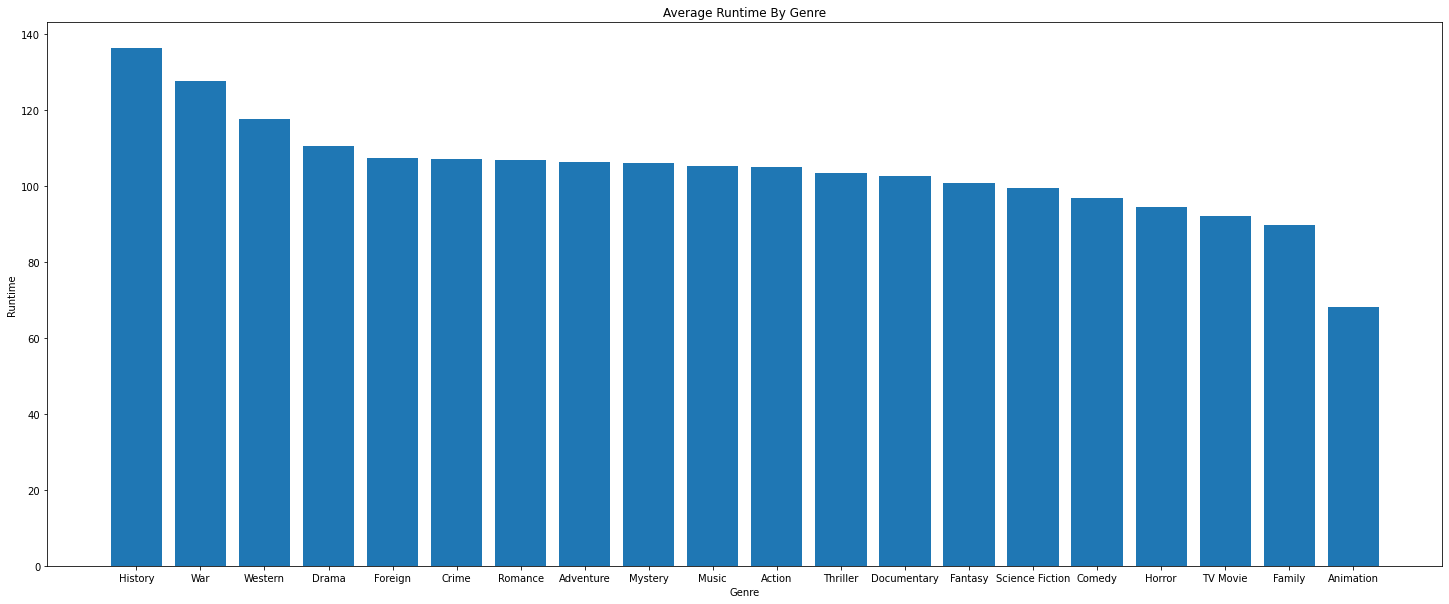

In [19]:
#width = runtime_mean.to_dict.keys()
plt.figure(figsize=(25,10))
plt.bar(runtime_mean.keys(), runtime_mean.values())
plt.title('Average Runtime By Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime');

Now we need to find the best five Genres

In [20]:
# Create a dictionary with last 5 values of vote average mean ordered descinding
genre_vote_avg = df_movies_genres.groupby('genres').vote_average.mean().sort_values().tail(5).to_dict()

In [21]:
# match each best 5 genre with it's runtime
best_runtime = {}

for i in genre_vote_avg:
    if i in runtime_mean:
        best_runtime[i]= runtime_mean[i]

### Average Runtime By Most liked Genres?

Now we need to plot the best five genres and their runtime

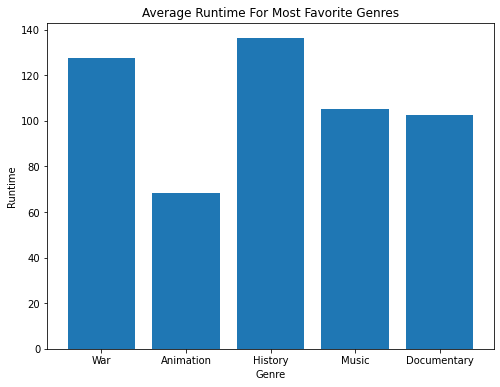

In [22]:
plt.figure(figsize=(8,6))
plt.bar(best_runtime.keys(), best_runtime.values())
plt.title('Average Runtime For Most Favorite Genres')
plt.xlabel('Genre')
plt.ylabel('Runtime');

### Is there a relation between Runtime and Average Vote

We need to use scatter plot for a new filtered dataframe that only includes the best genres

In [23]:
# this will filter the data for only the highest vote genres
df_best_five = df_movies_genres.query("genres in ['War', 'Animation', 'History', 'Music', 'Documentary']")

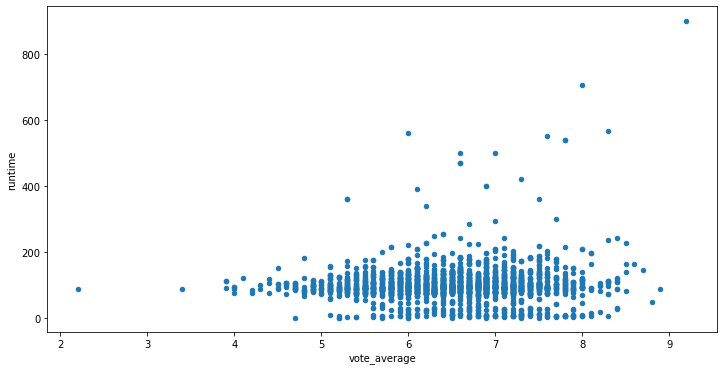

In [24]:
# This will scatter plot highest vote genres runtime and average vote
df_best_five.plot(y='runtime', x='vote_average', kind='scatter',figsize=(12,6));

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>First graph shows the average runtime for every genre, where History is the highest at 136 minutes and animation the lowet at 68 minutes</li>
<li>Most favorite <b>Genres are History 136m, War 127m, Music 105m, Documentry 102m, Animation 68m</b></li>
<li>There is a relation between average vote and runtime as movies that run at armound 100 minutes gets the most votes</li>
    <li>Most movies runtime is around that time between 100 and 110 minutes</li>
</ul>

### Limitations

The data for revenue and budget dose not feel accurate and needs further investigation which is beyond the scope of this analysis.

In [368]:

from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1